# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Surname1, Name1 (StudentID1);
2. Surname2, Name2 (StudentID2).

In [111]:
from random import random

from dask.delayed import unzip
from intake.source.cache import display
from param import DataFrame
from spyder_kernels.utils.lazymodules import pandas

StudentID1 = 298272  # <-------- Fill in the missing value
StudentID2 = 338616  # <-------- Fill in the missing value

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [112]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Finance
Music
Interests
*************************************
*** THESE ARE THE SELECTED FEATURES:
Waiting
Eating to survive
Achievements
Questionnaires or polls
Parents' advice
Dreams
Children
Thinking ahead
Writing notes
Compassion to animals
Loneliness
Reliability
Mood swings
God
Loss of interest
Happiness in life
Life struggles
Hypochondria
New environment
Charity
Cheating in school
Empathy
Responding to a serious letter
Borrowed stuff
Judgment calls
Daily events
Keeping promises
Lying
Self-criticism
Decision making
Health
Getting up
Assertiveness
Criminal damage
Public speaking
Giving
Interests or hobbies
Friends versus money
Smoking
Alcohol
Healthy eating
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swin

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [113]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [114]:
responses_df = pd.read_csv("responses_hw.csv")




responses_df['Smoking'] = responses_df['Smoking'].replace({
    'never smoked': 0,
    'tried smoking': 1,
    'former smoker': 2,
    'current smoker': 3
})

responses_df['Alcohol'] = responses_df['Alcohol'].replace({
    'never': 0,
    'social drinker': 1,
    'drink a lot': 2
})

responses_df['Education'] = responses_df['Education'].replace({
    'currently a primary school pupil': 1,
    'primary school': 1,
    'secondary school': 2,
    'college/bachelor degree': 3,
    'masters degree': 3,
    'doctorate degree': 3
})

responses_df['Lying'] = responses_df['Lying'].replace({
    'never': 0,
    'only to avoid hurting someone': 1,
    'sometimes': 2,
    'everytime it suits me': 3
})

X_df = responses_df[these_features].copy()


/var/folders/tp/yvt6ykzd6x108j9lxzdnk2qm0000gn/T/ipykernel_56189/3205991003.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  responses_df['Smoking'] = responses_df['Smoking'].replace({
/var/folders/tp/yvt6ykzd6x108j9lxzdnk2qm0000gn/T/ipykernel_56189/3205991003.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  responses_df['Alcohol'] = responses_df['Alcohol'].replace({
/var/folders/tp/yvt6ykzd6x108j9lxzdnk2qm0000gn/T/ipykernel_56189/3205991003.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

In [115]:
#X_df.fillna(X_df.mode().iloc[0],inplace=True)
# i want to get the number of rows that contains at least a missing value
X_df.dropna(inplace=True)



# Comment
We cannot perform PCA with categorical features.
In this dataset, the categorical features include *Smoking*, *Alcohol*, and *Lying*.
To transform these variables, we utilized a numerical replacement approach. 

- For Smoking, we assigned values from 0 (never smoked) to 3 (current smoker).
- For Alcohol, we used a scale from 0 (never) to 2 (drink a lot). 
= For Lying, the values range from 0 (never) to 3 (everytime it suits me).

We chose this approach over One-Hot Encoding because there is a clear, inherent order among the categories. Numerical encoding maintains this ordinal relationship, which is crucial for accurately representing the data during analysis.

By encoding these variables numerically, we can ensure they are suitable for further analysis. We then selected relevant features for our analysis and created a subset of the dataset by randomly selecting two-thirds of the data points.


## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [116]:
Xstd_df = pd.DataFrame(StandardScaler().fit_transform(X_df), columns=X_df.columns)
Xmm_df = pd.DataFrame(MinMaxScaler().fit_transform(X_df), columns=X_df.columns)

In [117]:
# I want to compute the variance of all the features in X_df X_std_df and X_mm_df
var_X = X_df.var()
var_Xstd = Xstd_df.var()
var_Xmm = Xmm_df.var()
print('*** THESE ARE THE VARIANCES OF THE FEATURES:')
for ft in var_X.index:
    print(f'{ft}: {var_X[ft]}')
print('*************************************')

print('*** THESE ARE THE VARIANCES OF THE STANDARDIZED FEATURES:')
for ft in var_Xstd.index:
    print(f'{ft}: {var_Xstd[ft]}')
print('*************************************')

print('*** THESE ARE THE VARIANCES OF THE MINMAX SCALED FEATURES:')
for ft in var_Xmm.index:
    print(f'{ft}: {var_Xmm[ft]}')
print('*************************************')



*** THESE ARE THE VARIANCES OF THE FEATURES:
Waiting: 0.9542577758533591
Eating to survive: 1.4533809626903385
Achievements: 0.8481020422890999
Questionnaires or polls: 1.1674171898679335
Parents' advice: 0.7016778523489964
Dreams: 0.44063650140722904
Children: 1.2757992350436578
Thinking ahead: 1.3124882730749707
Writing notes: 2.082207548531427
Compassion to animals: 1.3306162950133535
Loneliness: 1.292271054340781
Reliability: 0.8833982824565193
Mood swings: 1.0619831132279645
God: 2.1893916432128
Loss of interest: 1.7746337591109216
Happiness in life: 0.6588835967381151
Life struggles: 1.8863751172692524
Hypochondria: 1.299245868514112
New environment: 1.2872844049938594
Charity: 1.050039691130838
Cheating in school: 1.5711120733203328
Empathy: 1.244417983690552
Responding to a serious letter: 1.364689326694088
Borrowed stuff: 1.1031500324745664
Judgment calls: 0.8991917442447829
Daily events: 1.2630006494912194
Keeping promises: 0.7727610593923662
Lying: 0.5477664718192999
Self-cr

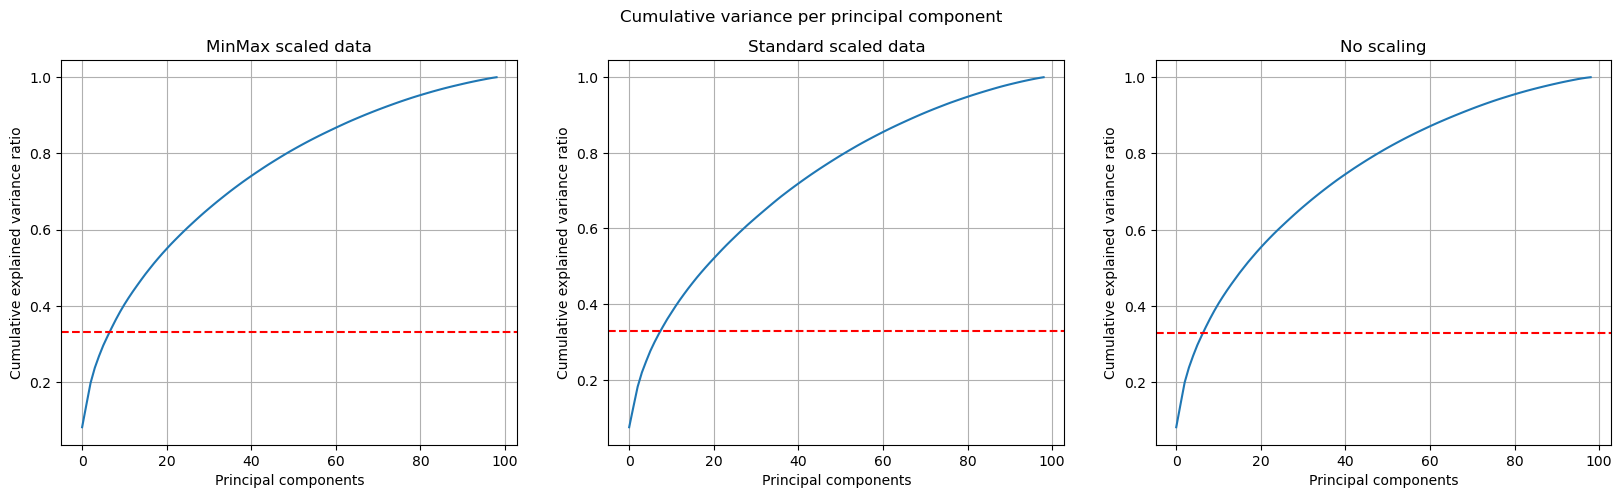

In [118]:

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
pc_no_scaling = PCA()
pc_no_scaling.fit(X_df.values)
cum_sum_no_scaling = np.cumsum(pc_no_scaling.explained_variance_ratio_)
axes[2].plot(cum_sum_no_scaling, label='No scaling')
axes[2].set_title("No scaling")
axes[2].set_xlabel("Principal components")
axes[2].set_ylabel("Cumulative explained variance ratio")
axes[2].axhline(y=0.33, color='r', linestyle='--', label='33% explained variance')
axes[2].grid()
pc_min_max = PCA()
pc_min_max.fit(Xmm_df.values)
cum_sum_min_max = np.cumsum(pc_min_max.explained_variance_ratio_)
fig.suptitle('Cumulative variance per principal component')
axes[0].plot(cum_sum_min_max, label='MinMax scaled data')
axes[0].set_title("MinMax scaled data")
axes[0].set_xlabel("Principal components")
axes[0].set_ylabel("Cumulative explained variance ratio")
axes[0].axhline(y=0.33, color='r', linestyle='--', label='33% explained variance')
axes[0].grid()

pc_std = PCA()
pc_std.fit(Xstd_df.values)
cum_sum_std = np.cumsum(pc_std.explained_variance_ratio_)
axes[1].plot(cum_sum_std, label='Standard scaled data')
axes[1].axhline(y=0.33, color='r', linestyle='--', label='33% explained variance')
axes[1].set_title("Standard scaled data")
axes[1].set_xlabel("Principal components")
axes[1].set_ylabel("Cumulative explained variance ratio")
axes[1].grid()



# Comment 
Most of the features already have the same scaling (being almost all of them integers contained in the range 1-5), so the scaling technique does not significantly impact the cumulative explained variance rates per number of principal components in consideration.


## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [119]:
print(f"Min max saling:")
print(f"We can get 33% of the cumulative explained variance using the first {np.argmax(cum_sum_min_max > 0.333333)} PC")
pc_min_max = PCA(n_components=5)
pc_min_max.fit(Xmm_df.values)

Min max saling:
We can get 33% of the cumulative explained variance using the first 7 PC


PCA(n_components=5)

In [120]:
def find_column_type(column_name):
    for type, columns in variables_by_type.items():
        if column_name in columns:
            return type
    return None
def plot_pca_components(pcx, only_interesting=False):
    fig, axes = plt.subplots(nrows=(pcx.n_components_ + 1) // 2, ncols=2, figsize=(30, 70))
    # i want to have less padding between the rows
    fig.tight_layout()
    # too tight space between rows
    fig.subplots_adjust(hspace=0.1, wspace=0.2)
    if pcx.n_components_ % 2:
        fig.delaxes(axes[-1, -1])
    for i in range(pcx.n_components_):
        
        ax = axes[i//2, i%2]
        ax.grid()
        ax.set_title(f"PC {i + 1}", fontsize=30)
        eps = np.sqrt(1/pcx.n_features_in_)
        interesting_columns = np.abs(pcx.components_[i]) > (eps if only_interesting else 0) 
        if only_interesting:
            colors = ['r' if val < 0 else 'g' for val in pcx.components_[i, interesting_columns]]
        else:
            colors = these_types
            ax.axvline(x=eps, color='r')
            ax.axvline(x=-eps, color='r')
        ls = [find_column_type(col) for col in Xmm_df.columns[interesting_columns]]
        unique_types = list(set(ls))
        color_map = {t: plt.cm.tab20(i) for i, t in enumerate(unique_types)}
        colors = [color_map[t] for t in ls]
        handles = [plt.Line2D([0], [0], color=color_map[t], lw=4, label=t) for t in unique_types]
        ax.barh(Xmm_df.columns[interesting_columns], pcx.components_[i, interesting_columns], color=colors)
        ax.legend(handles=handles)


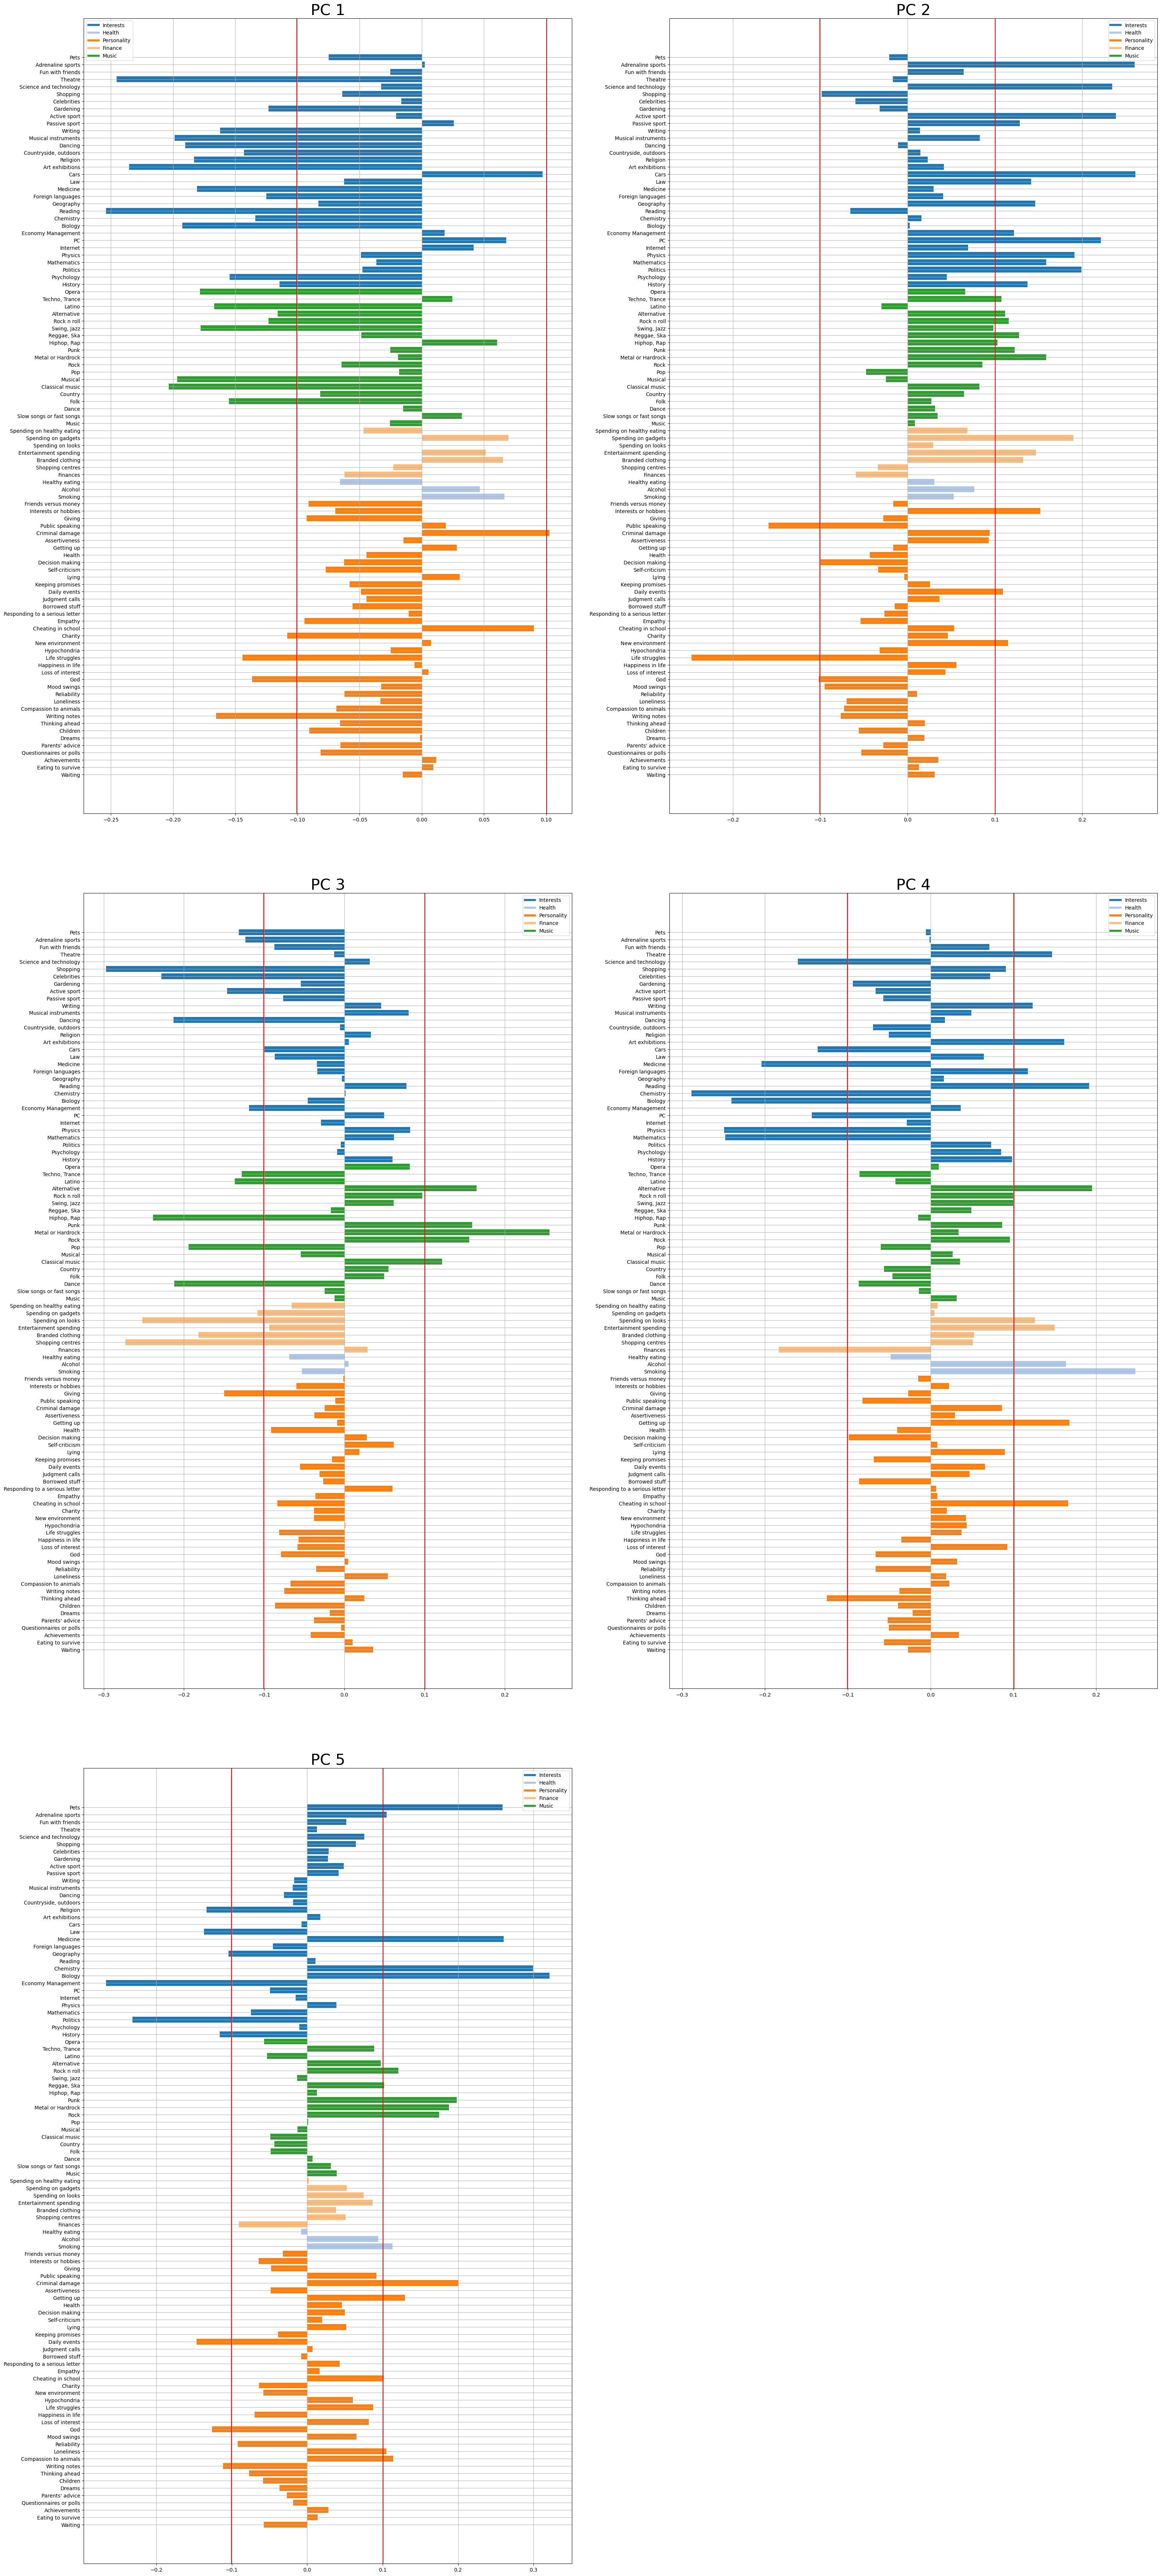

In [121]:
plot_pca_components(pc_min_max)

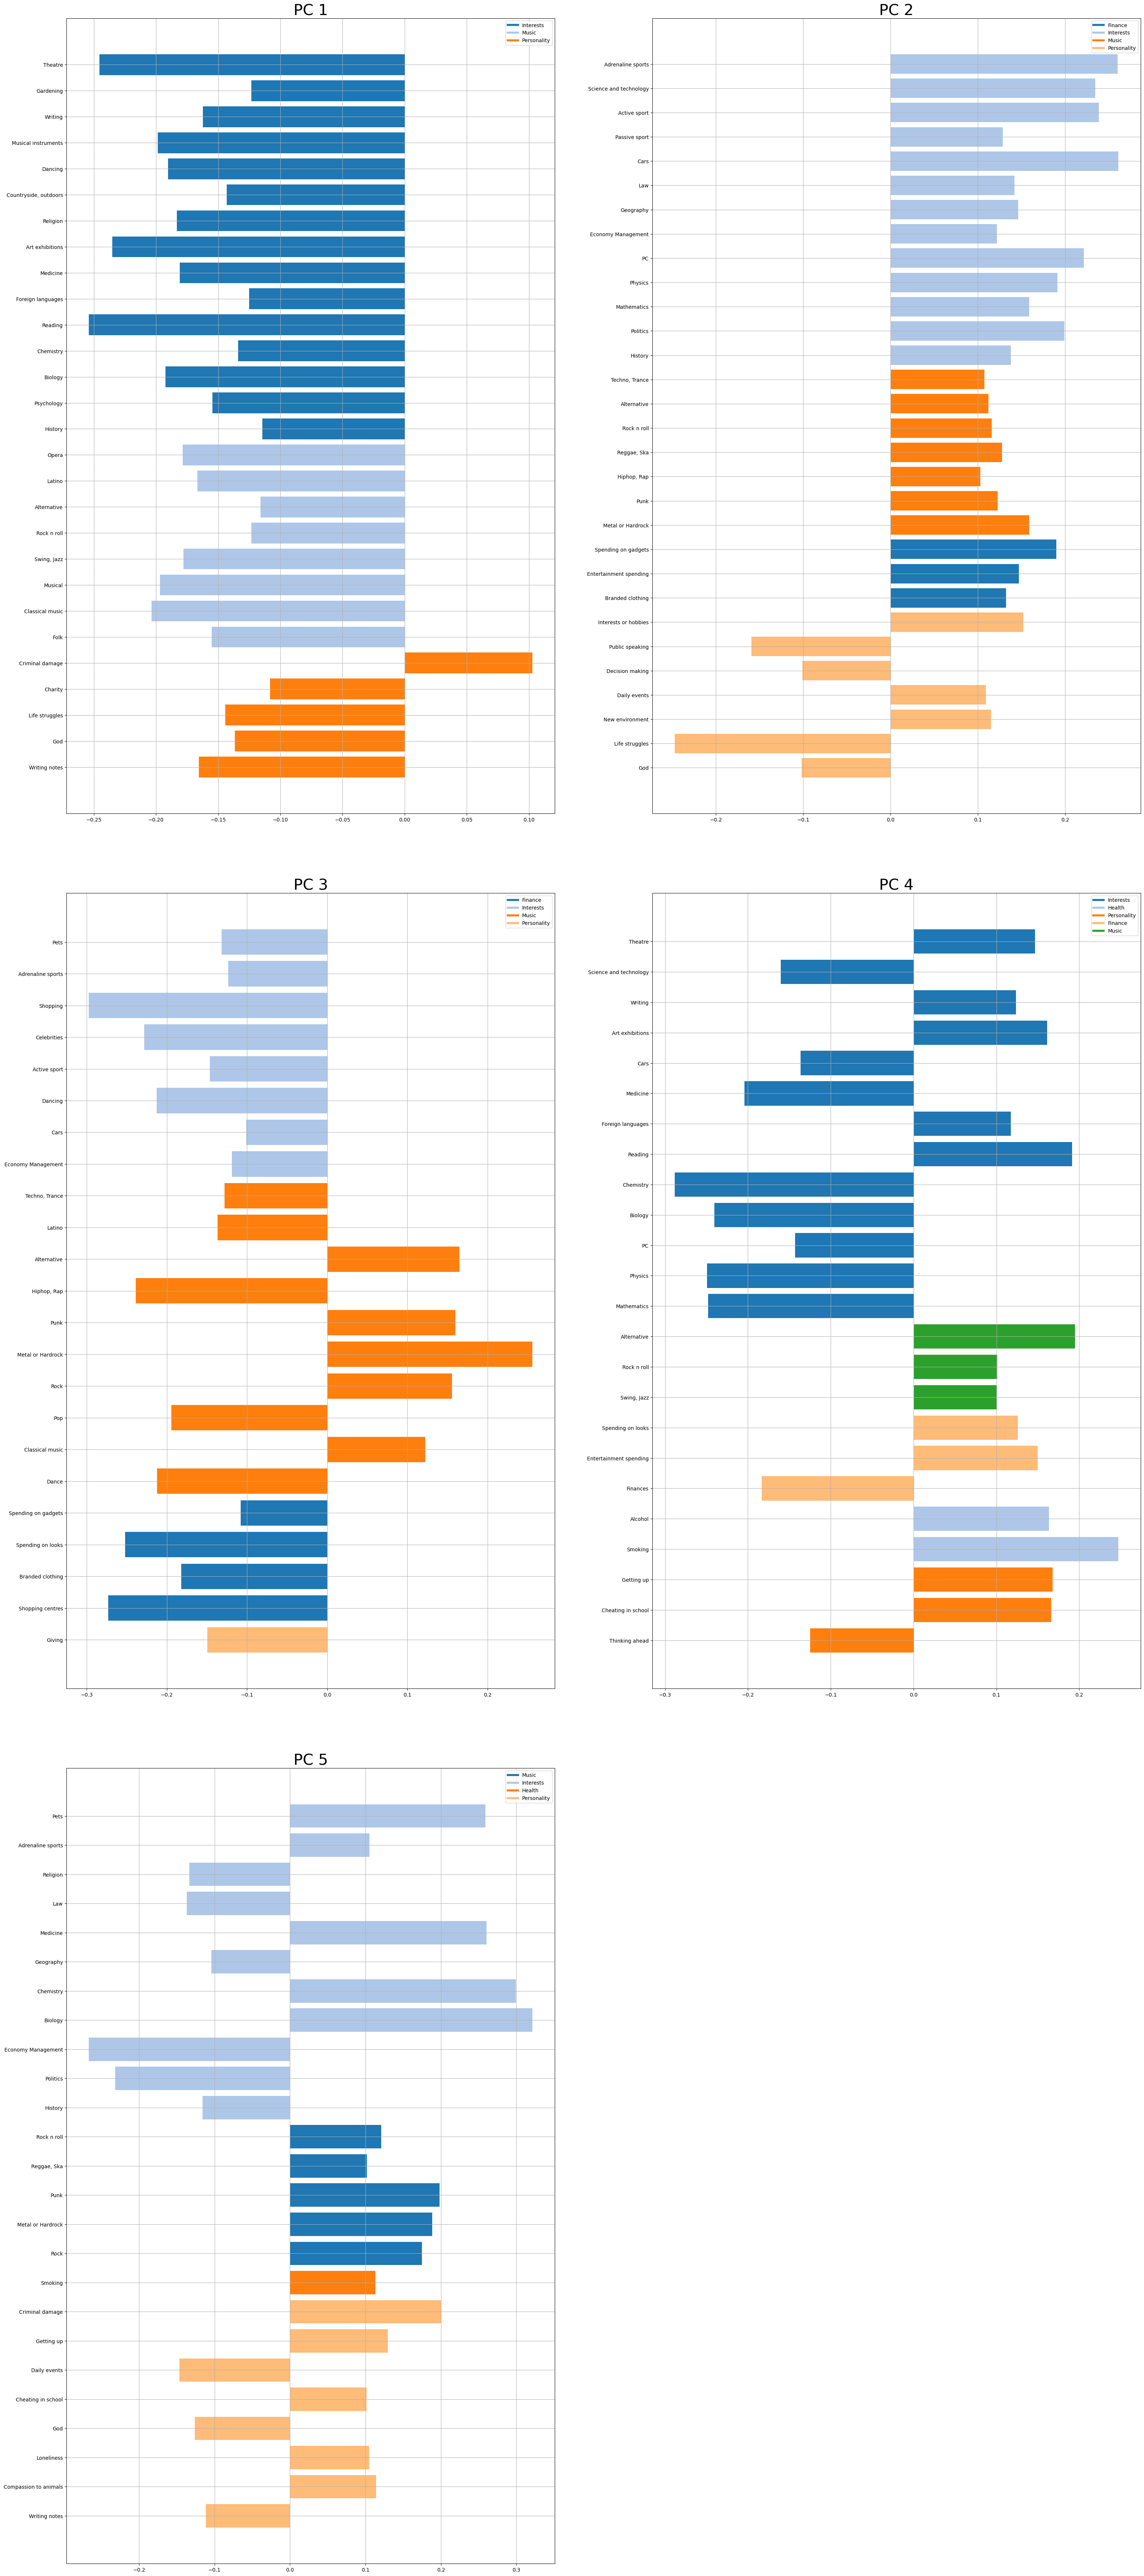

In [122]:
plot_pca_components(pc_min_max, only_interesting=True)

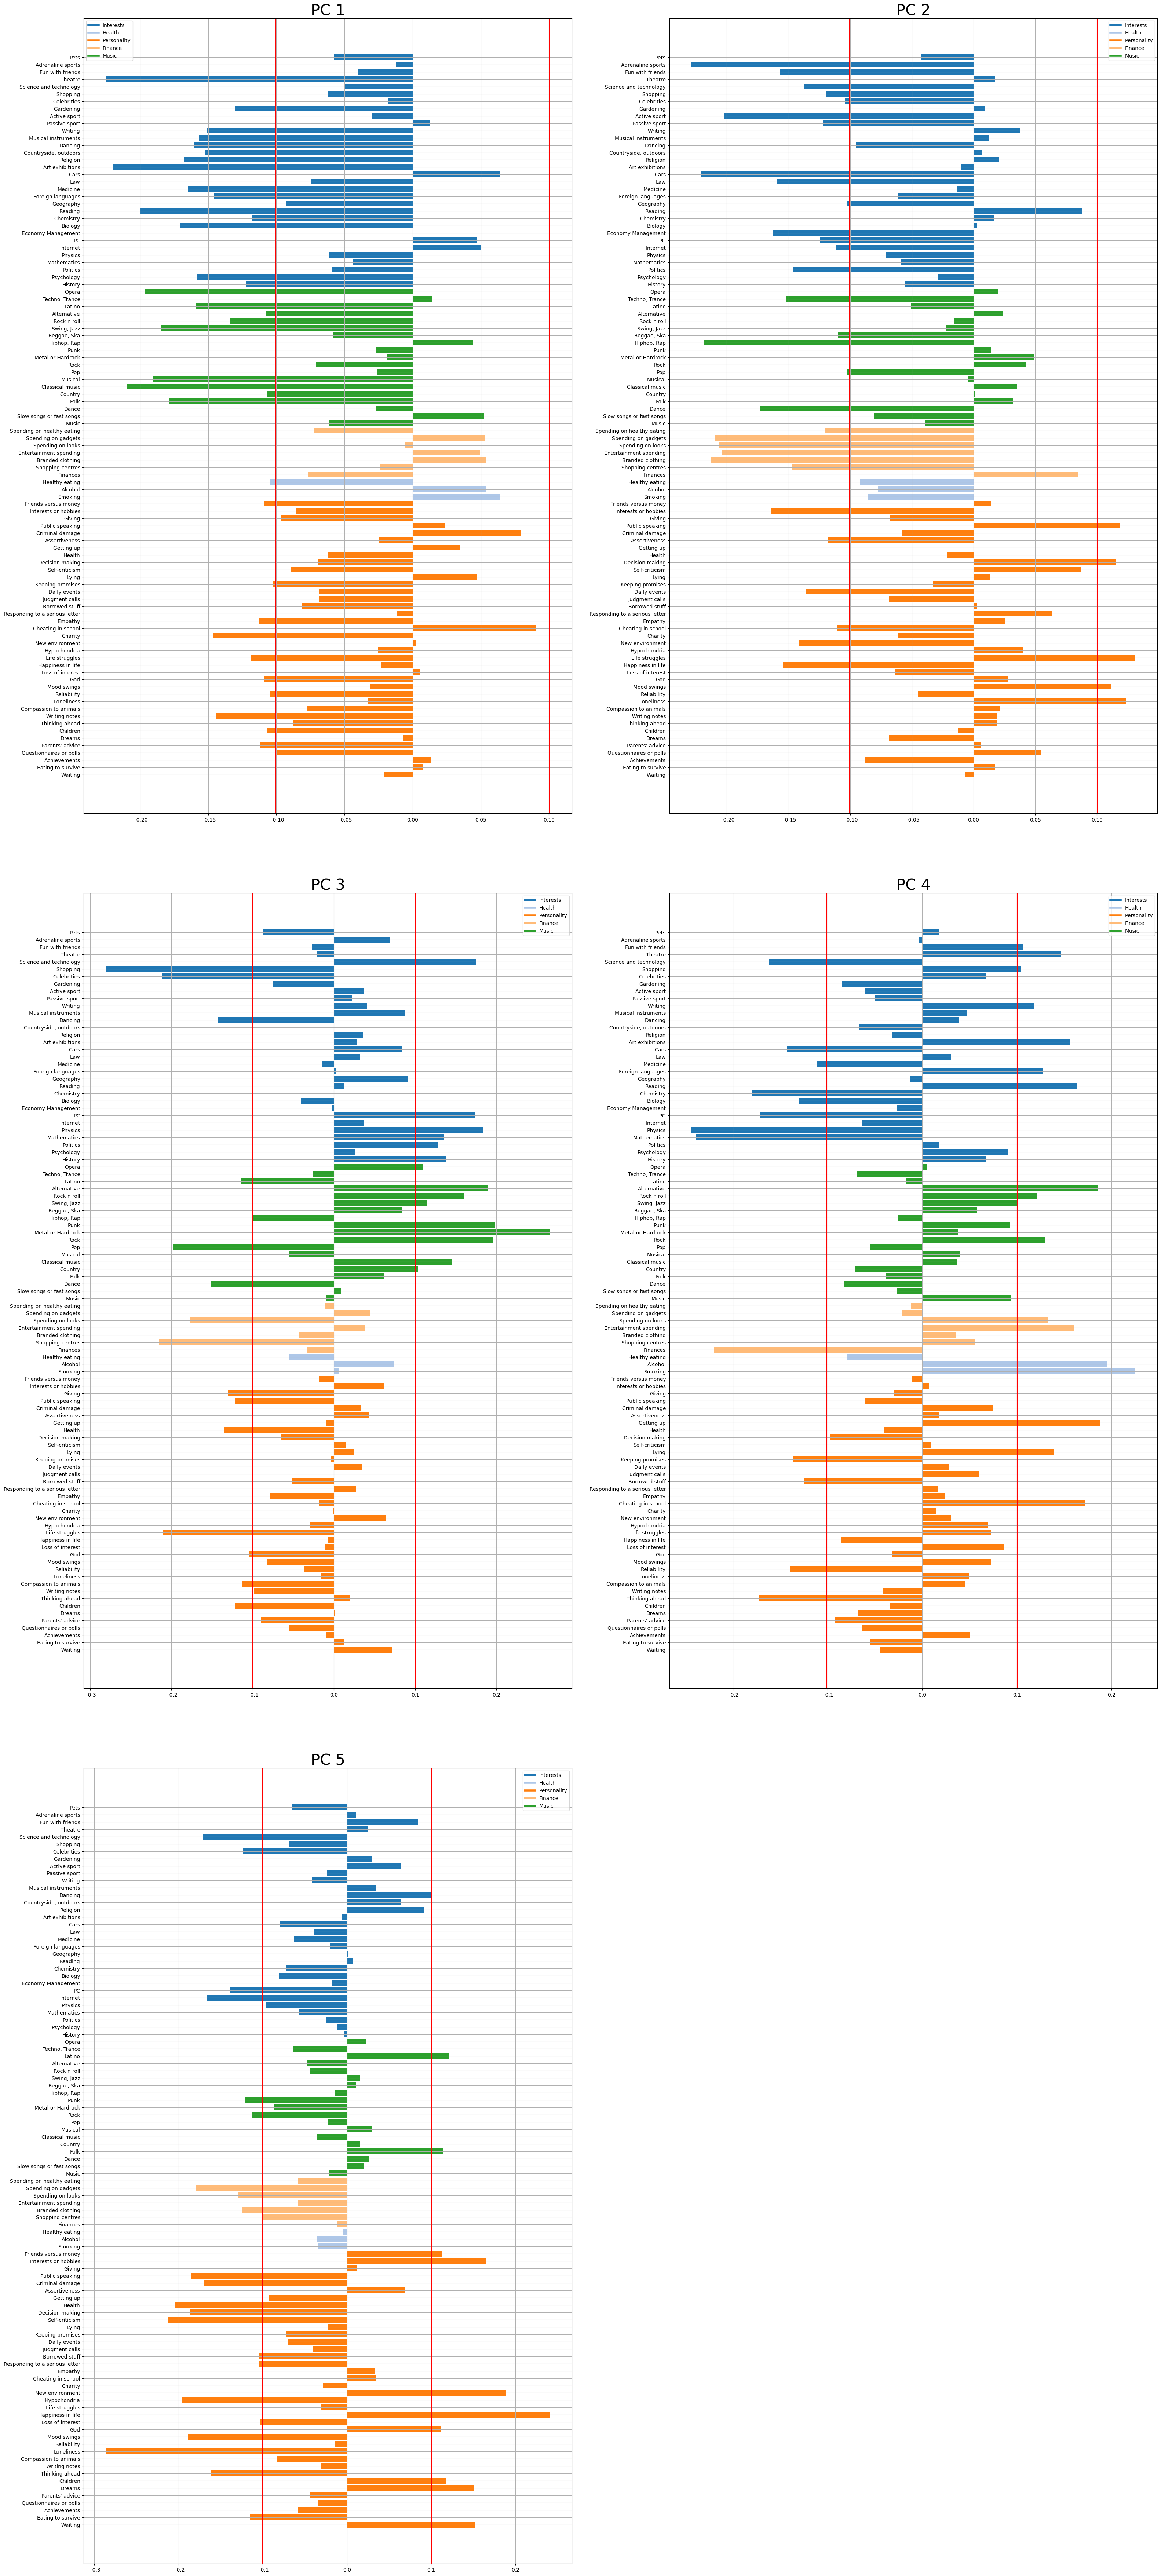

In [123]:
pc_std = PCA(n_components=5)
pc_std.fit(Xstd_df.values)
plot_pca_components(pc_std)

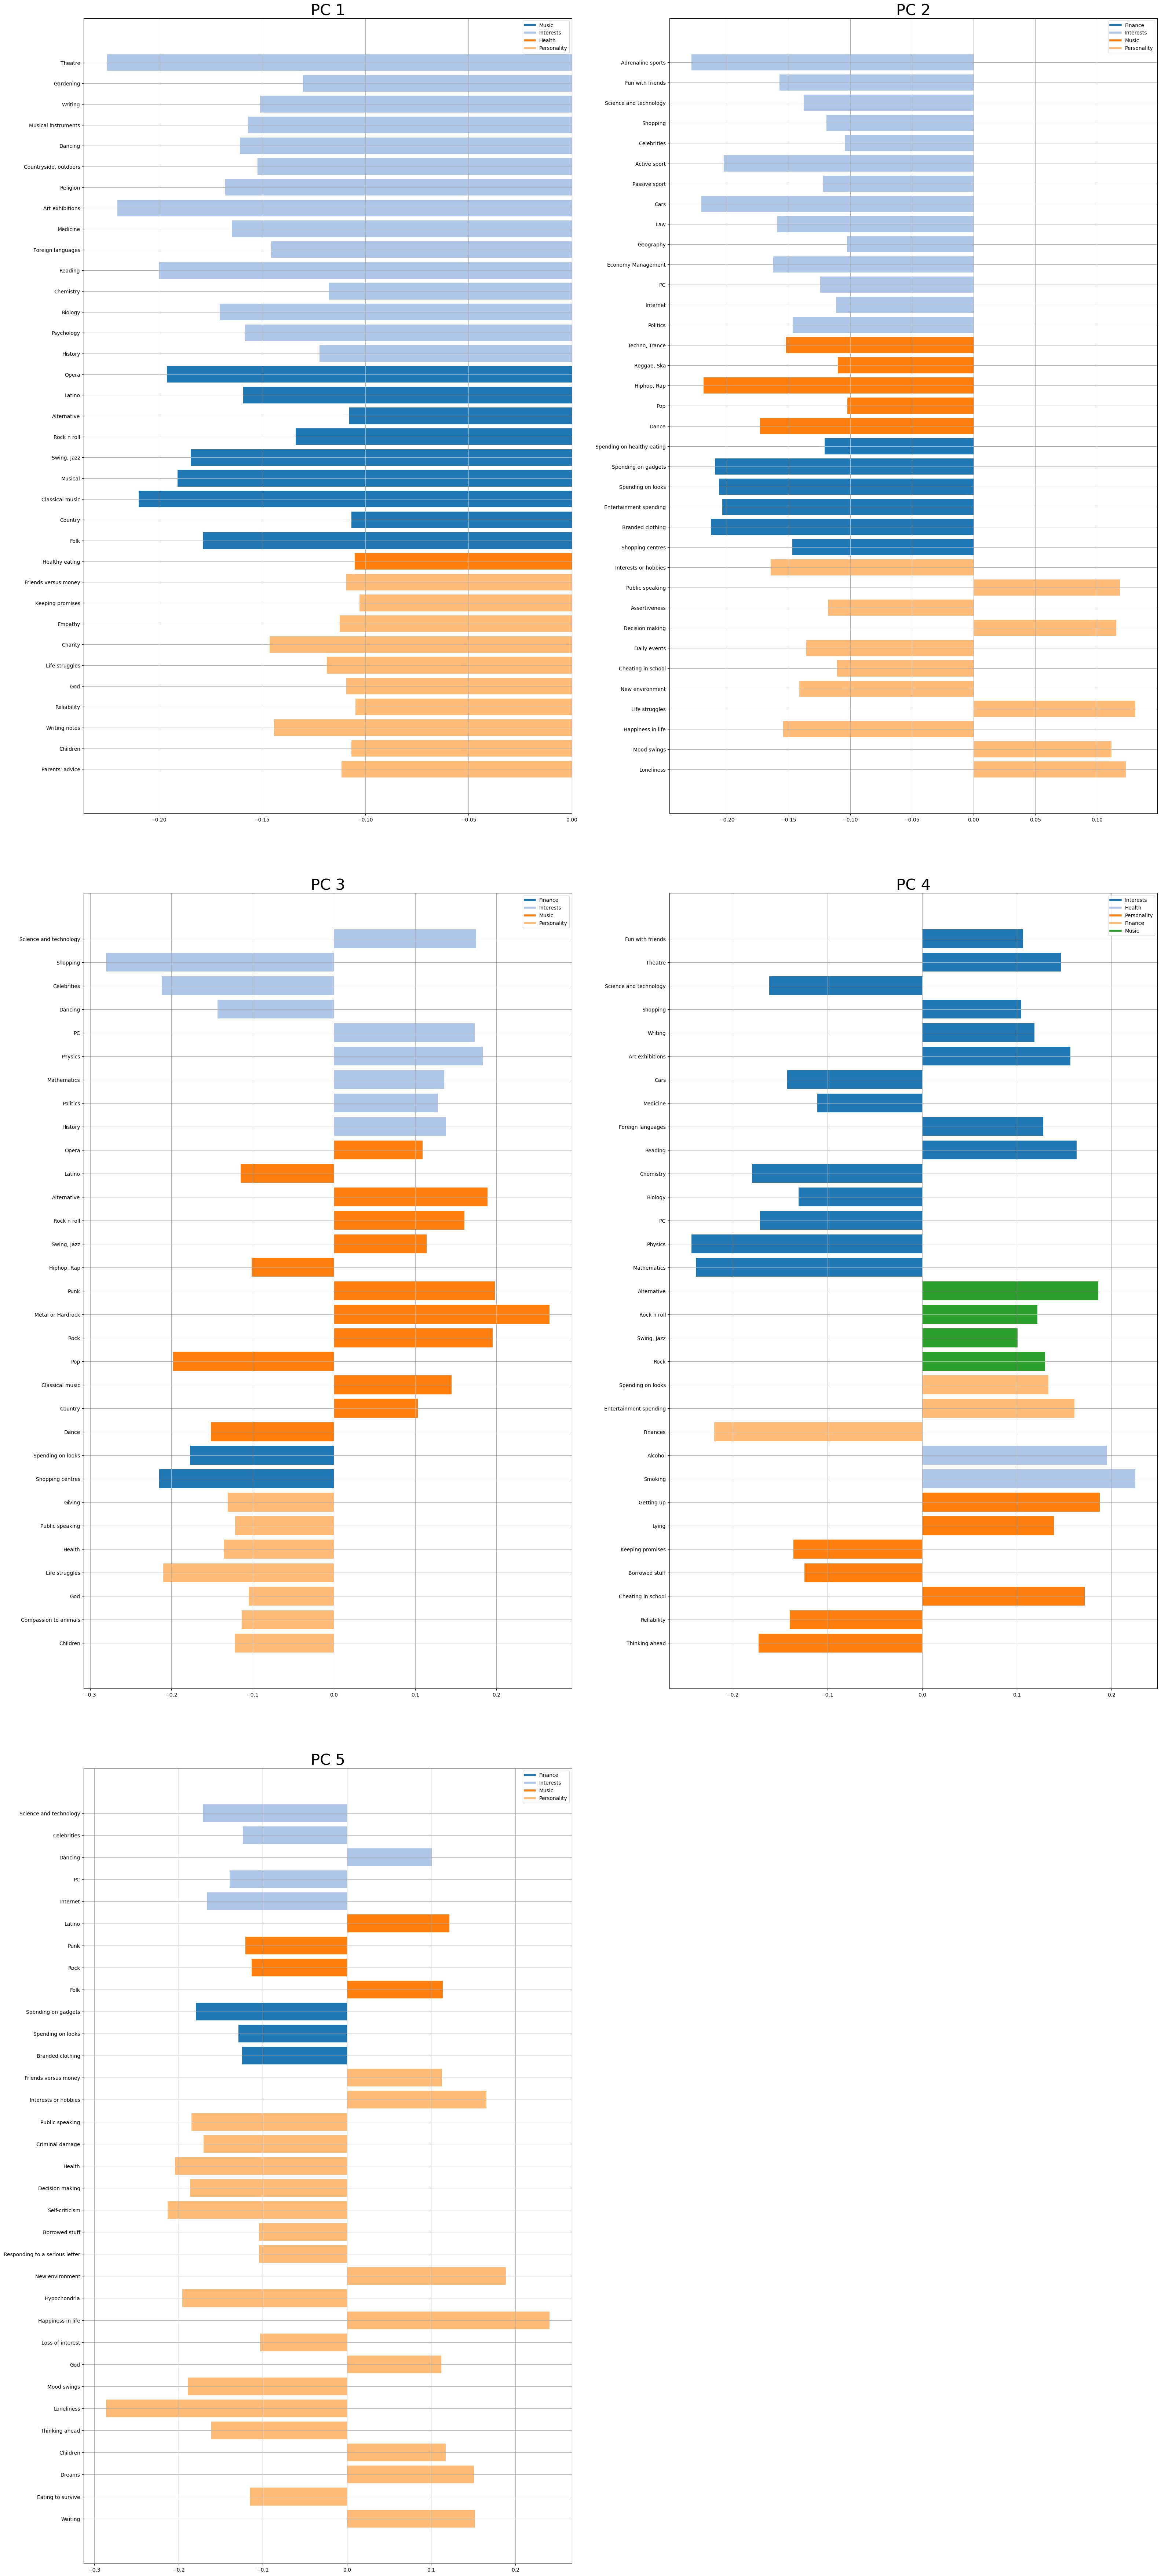

In [124]:
plot_pca_components(pc_std, only_interesting=True)

In [125]:
PC_labels = [
    "Abstract Thinking vs. Practical Skills",
    "Strategic Thinking vs. Routine Operations",
    "Social Interaction vs. Analytical Expertise",
    "Emotional Engagement vs. Logical Detachment",
    "Physical Activity and Creative Potential"
]

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

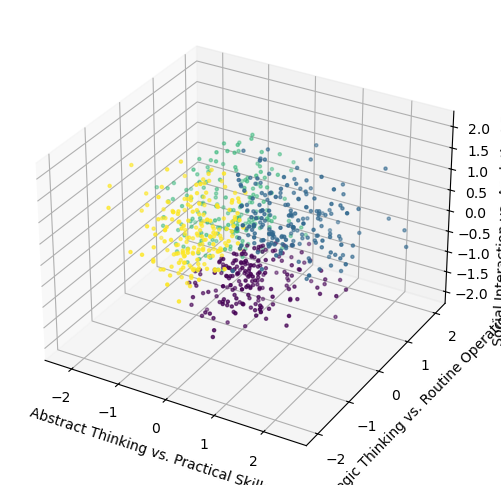

<Figure size 640x480 with 0 Axes>

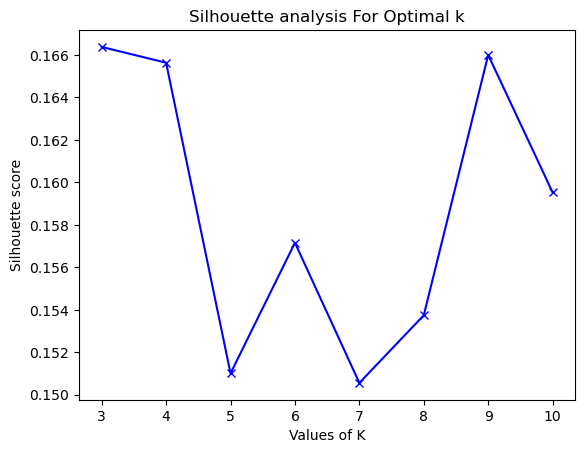

In [131]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
transformed = pc_min_max.transform(Xmm_df.values)
km = KMeans(n_clusters=4)
labels_km = km.fit_predict(transformed)
# i want to plot the clusters in 3D
# projecting the data in 3D
#label name dont fit in picture 

fig, ax2 = plt.subplots(figsize=(6, 48), subplot_kw={'projection': '3d'})

ax2.scatter(transformed[:,0], transformed[:,1], transformed[:,2], c=labels_km, s=5)
ax2.set_xlabel(PC_labels[0])
ax2.set_ylabel(PC_labels[1])
ax2.set_zlabel(PC_labels[2])
#ax2.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,3], c='red')
plt.figure()
range_n_clusters = list(range(3, 11))
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_seed)
    kmeans.fit(transformed)
    cluster_labels = kmeans.labels_
    
    
    # silhouette score
    silhouette_avg.append(silhouette_score(transformed, cluster_labels, random_state=random_seed))

plt.figure()
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()



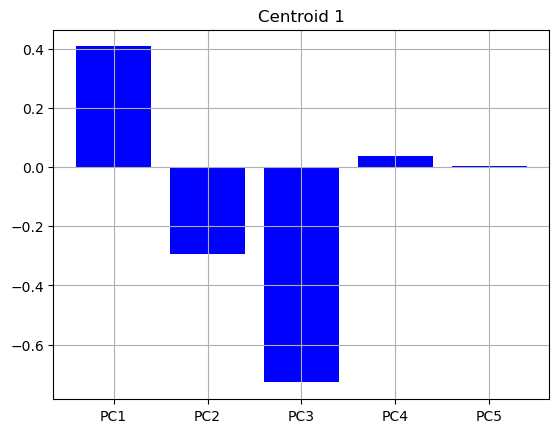

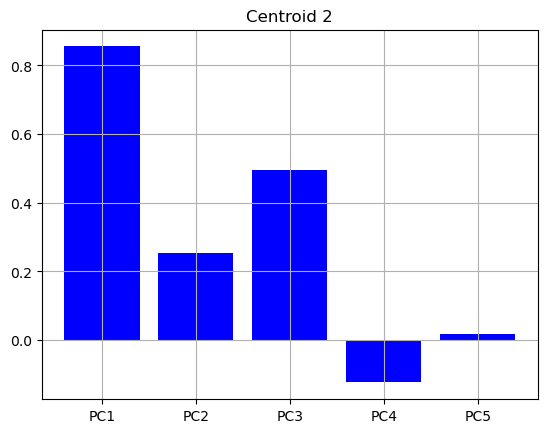

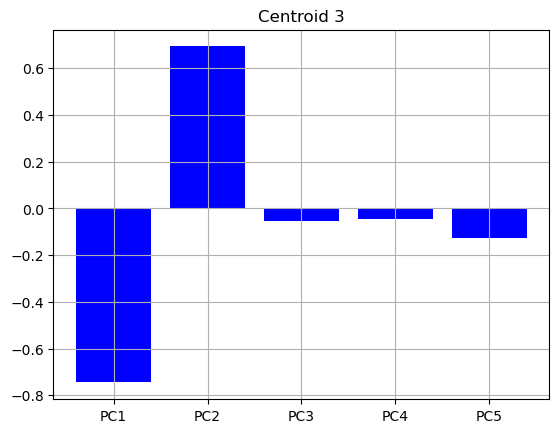

In [132]:
#plot only centroids positions using bar plot
for i in range(3):
    plt.figure()
    plt.title(f"Centroid {i+1}")
    plt.bar([f"PC{j}" for j in range(1,6)], km.cluster_centers_[i], color='b')
    plt.grid()

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

Text(0.5, 0, 'Social Interaction vs. Analytical Expertise')

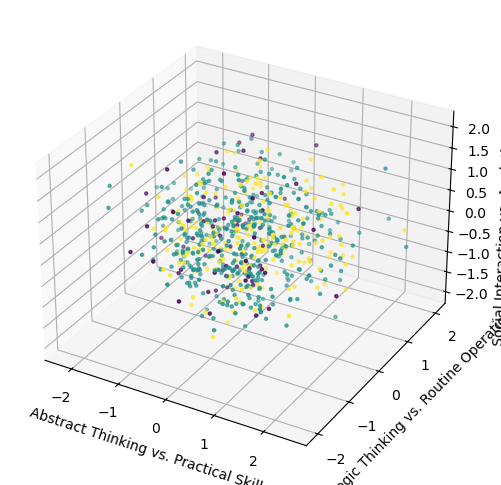

In [133]:
#plot gender distribution in each cluster
# I WANT TO REPLACE AGE WITH 0 if the age is less than 18 and 1 if the age is greater than 18 and less than 35 and 2 if the age is greater than 35
gender_label = responses_df.iloc[Xmm_df.index]['Education']




fig, ax2 = plt.subplots(figsize=(6, 48), subplot_kw={'projection': '3d'})

ax2.scatter(transformed[:,0], transformed[:,1], transformed[:,2], c=gender_label, s=5)
ax2.set_xlabel(PC_labels[0])
ax2.set_ylabel(PC_labels[1])
ax2.set_zlabel(PC_labels[2])

In [129]:
labels

['Age',
 'Height',
 'Weight',
 'Number of siblings',
 'Gender',
 'Hand',
 'Education',
 'Only child',
 'Home Town Type',
 'Home Type']

In [130]:
responses_df['Education']


0       3.0
1       3.0
2       2.0
3       3.0
4       2.0
       ... 
1005    2.0
1006    3.0
1007    2.0
1008    3.0
1009    2.0
Name: Education, Length: 1010, dtype: float64